In [1]:
#  Required Libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPool2D, BatchNormalization,
                                     Flatten, Dense, Dropout)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping






In [3]:


#  Load Images and Labels
categories = ['short_hair', 'long_hair']
image_data = pd.DataFrame(columns=['img_array', 'label'])
img_id = 0

for class_idx, folder in enumerate(categories):
    path = os.path.join("hair_seperation", folder)
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, filename)).convert('L').resize((110, 110))
            normalized = np.array(img).astype(np.float32) / 255.0
            image_data.loc[img_id] = [normalized, class_idx]
            img_id += 1
        except:
            continue


In [4]:

#  Shuffle multiple times for better distribution
for _ in range(10):
    image_data = image_data.sample(frac=1).reset_index(drop=True)


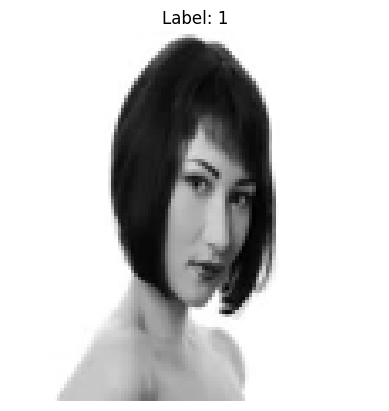

In [5]:

#  Preview first image
plt.imshow(image_data['img_array'][0], cmap='gray')
plt.title(f"Label: {image_data['label'][0]}")
plt.axis('off')
plt.show()

In [6]:

#  Prepare Input and Labels
X = np.stack(image_data['img_array'].values).reshape(-1, 110, 110, 1)
Y = image_data['label'].values

In [7]:

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, stratify=Y, random_state=42
)

In [8]:

#  Define CNN Model
def create_hair_classifier(input_shape=(110, 110, 1)):
    input_layer = Input(shape=input_shape)

    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPool2D((2, 2))(x)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.25)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.25)(x)

    output = Dense(1, activation='sigmoid', name='hair')(x)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [9]:

#  Train the Model
hair_model = create_hair_classifier()
hair_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 110, 110, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 110, 110, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 110, 110, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 55, 55, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 55, 55, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hair (Dense)                    │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,693,633 (21.72 MB)

 Trainable params: 5,693,409 (21.72 MB)

 Non-trainable params: 224 (896.00 B)

In [10]:

#  Save Best Model + Early Stop
checkpoint = ModelCheckpoint("hairDetect.keras", monitor='val_loss', save_best_only=True)
early_stop = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

history = hair_model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=200,
    batch_size=8,
    shuffle=True,
    steps_per_epoch=len(X_train) // 5,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/200
4/5 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5497 - loss: 1.8093 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5628 - loss: 1.8034 - val_accuracy: 0.3333 - val_loss: 0.7190
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8176 - loss: 1.0639 - val_accuracy: 0.5833 - val_loss: 0.8229
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7478 - loss: 7.6974 - val_accuracy: 0.5833 - val_loss: 1.1307
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9638 - loss: 0.6754 - val_accuracy: 0.5833 - val_loss: 1.5547
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8538 - loss: 2.1481 - val_accuracy: 0.5833 - val_loss: 2.1363
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9026 - loss: 0.1331 - val_accuracy: 0.5833 - val_loss: 2.9507
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9763 - loss: 0.2547 - val_accuracy: 0.5833 - val_loss: 3.4119
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9763 - loss: 0.6458 - val_accuracy: 0.5833 - val_loss: 3.5083
Epoc

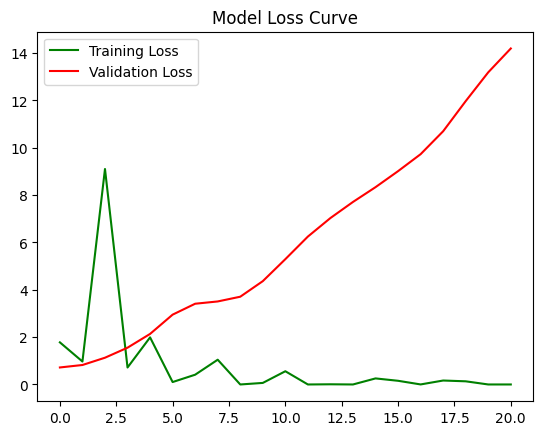

In [11]:


#  Plot Training vs. Validation Loss
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Model Loss Curve")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


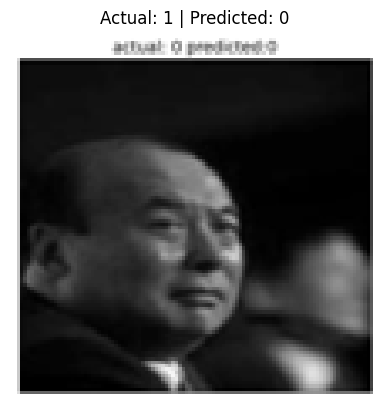

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


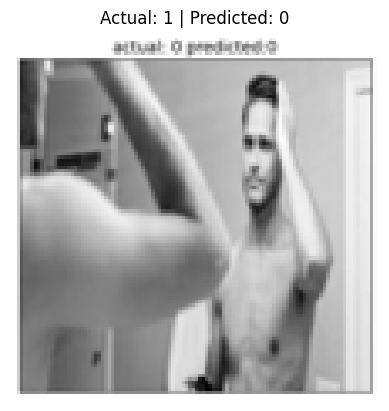

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


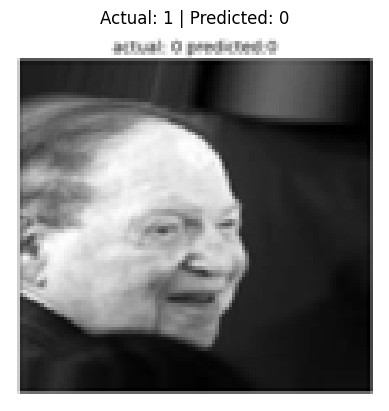

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


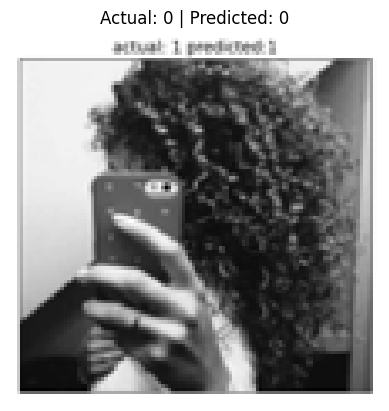

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


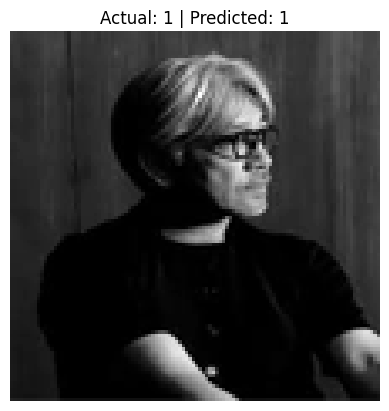

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


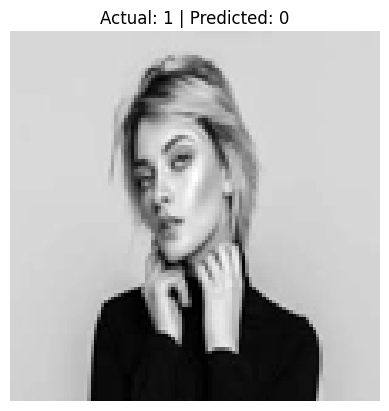

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


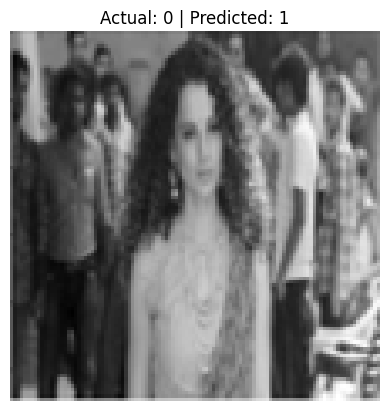

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


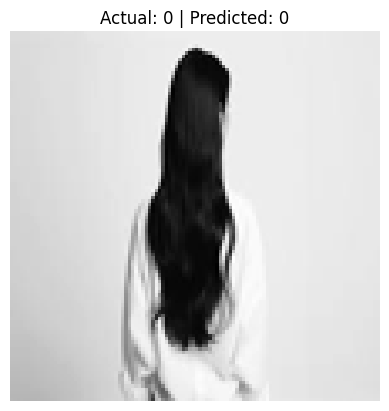

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


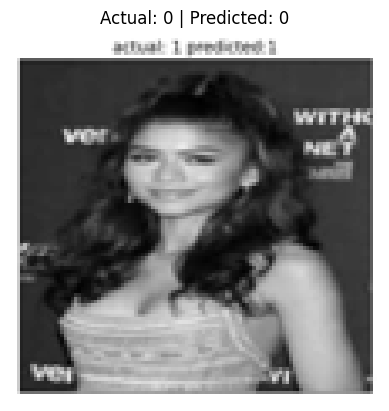

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


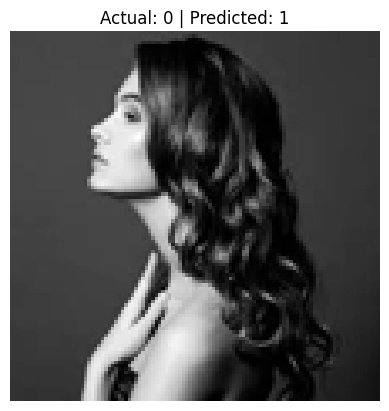

In [16]:


#  Predictions on Test Set
for i in range(10):
    plt.imshow(X_test[i], cmap='gray')
    pred = hair_model.predict(np.expand_dims(X_test[i], axis=0))[0][0]
    plt.title(f"Actual: {Y_test[i]} | Predicted: {int(pred > 0.5)}")
    plt.axis('off')
    plt.show()


In [18]:


# Evaluation Metrics
preds = hair_model.predict(X_test) > 0.5
print("✔️ Accuracy:", accuracy_score(Y_test, preds))
print(" Confusion Matrix:\n", confusion_matrix(Y_test, preds))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
✔️ Accuracy: 0.3333333333333333
 Confusion Matrix:
 [[3 2]
 [6 1]]
